# Student Performance - EDA

## Set Up Environment

In [1]:
# Import libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read CSV file into a dataframe.
scores = pd.read_csv('data/StudentsPerformance.csv')
scores.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


## Inspect and Clean Data

In [3]:
# This data set has 1,000 rows and 8 columns.
scores.shape

(1000, 8)

In [4]:
# There are 5 categorical columns and 3 numeric columns.  None of them have missing values.
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
scores.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [6]:
# There are no duplicate rows.
sum(scores.duplicated())

0

In [7]:
new_columns = {
    'gender': 'gender',
    'race/ethnicity': 'race_ethnicity',
    'parental level of education': 'parental_level_of_education',
    'lunch': 'lunch',
    'test preparation course': 'test_preparation_course',
    'math score': 'math_score',
    'reading score': 'reading_score',
    'writing score': 'writing_score'
}
scores.rename(columns=new_columns, inplace=True)

In [8]:
# Unique values of each categorical variable.
scores['gender'].unique()

array(['female', 'male'], dtype=object)

In [9]:
# Unique values of each categorical variable.
scores['race_ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [10]:
# Unique values of each categorical variable.
scores['parental_level_of_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [11]:
# Unique values of each categorical variable.
scores['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [12]:
# Unique values of each categorical variable.
scores['test_preparation_course'].unique()

array(['none', 'completed'], dtype=object)

## Exploratory Data Analysis

### Distributions

In [13]:
# Distribution of each categorical variable.
scores['gender'].value_counts(normalize=True)

female    0.518
male      0.482
Name: gender, dtype: float64

In [14]:
# Distribution of each categorical variable.
scores['race_ethnicity'].value_counts(normalize=True)

group C    0.319
group D    0.262
group B    0.190
group E    0.140
group A    0.089
Name: race_ethnicity, dtype: float64

In [15]:
# Distribution of each categorical variable.
scores['parental_level_of_education'].value_counts(normalize=True)

some college          0.226
associate's degree    0.222
high school           0.196
some high school      0.179
bachelor's degree     0.118
master's degree       0.059
Name: parental_level_of_education, dtype: float64

In [16]:
# Distribution of each categorical variable.
scores['lunch'].value_counts(normalize=True)

standard        0.645
free/reduced    0.355
Name: lunch, dtype: float64

In [17]:
# Distribution of each categorical variable.
scores['test_preparation_course'].value_counts(normalize=True)

none         0.642
completed    0.358
Name: test_preparation_course, dtype: float64

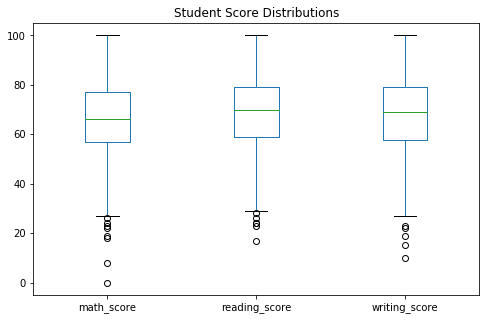

In [18]:
# Distributions of student scores in each subject.
scores.plot.box(figsize=(8,5), title='Student Score Distributions')
plt.savefig('charts/score_distributions.jpg')

In [19]:
# Looking at some of the outliers on the low end for each subject, this data is still reasonable.
scores[scores['math_score'] < 20]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
787,female,group B,some college,standard,none,19,38,32
980,female,group B,high school,free/reduced,none,8,24,23


In [20]:
# Looking at some of the outliers on the low end for each subject, this data is still reasonable.
scores[scores['reading_score'] < 20]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
59,female,group C,some high school,free/reduced,none,0,17,10


In [21]:
# Looking at some of the outliers on the low end for each subject, this data is still reasonable.
scores[scores['writing_score'] < 20]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
59,female,group C,some high school,free/reduced,none,0,17,10
327,male,group A,some college,free/reduced,none,28,23,19
596,male,group B,high school,free/reduced,none,30,24,15


### Relationships to Target Variables

In [22]:
# Looking at the correlation matrix, reading and writing are highly correlated.  Less so for math but still strong.
scores.corr()

,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


In [23]:
scores.groupby('gender').mean()

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [24]:
scores.groupby('race_ethnicity').mean()

,math_score,reading_score,writing_score
race_ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [25]:
scores.groupby('parental_level_of_education').mean()

,math_score,reading_score,writing_score
parental_level_of_education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


In [26]:
scores.groupby('lunch').mean()

,math_score,reading_score,writing_score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [27]:
scores.groupby('test_preparation_course').mean()

,math_score,reading_score,writing_score
test_preparation_course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [28]:
scores.groupby(['gender', 'race_ethnicity']).mean()

math_score  reading_score  writing_score
gender race_ethnicity                                          
female group A          58.527778      69.000000      67.861111
       group B          61.403846      71.076923      70.048077
       group C          62.033333      71.944444      71.777778
       group D          65.248062      74.046512      75.023256
       group E          70.811594      75.840580      75.536232
male   group A          63.735849      61.735849      59.150943
       group B          65.930233      62.848837      60.220930
       group C          67.611511      65.424460      62.712230
       group D          69.413534      66.135338      65.413534
       group E          76.746479      70.295775      67.394366

In [29]:
scores.groupby(['lunch', 'test_preparation_course']).mean()

math_score  reading_score  writing_score
lunch        test_preparation_course                                          
free/reduced completed                 63.045802      69.870229      70.351145
             none                      56.508929      61.602679      58.736607
standard     completed                 73.533040      76.215859      76.766520
             none                      68.133971      69.177033      67.595694

In [30]:
scores.groupby(['lunch', 'race_ethnicity']).mean()

math_score  reading_score  writing_score
lunch        race_ethnicity                                          
free/reduced group A          55.222222      60.555556      57.194444
             group B          57.434783      63.971014      61.521739
             group C          56.412281      63.412281      61.412281
             group D          61.115789      66.431579      66.452632
             group E          66.560976      68.731707      67.195122
standard     group A          65.981132      67.471698      66.396226
             group B          66.884298      69.280992      67.925620
             group C          68.941463      72.268293      71.395122
             group D          70.916168      72.077844      72.245509
             group E          76.828283      74.808081      73.151515

In [31]:
scores.groupby(['parental_level_of_education', 'race_ethnicity']).mean()

math_score  reading_score  \
parental_level_of_education race_ethnicity                              
associate's degree          group A          61.000000      67.071429   
                            group B          66.097561      69.585366   
                            group C          66.730769      71.128205   
                            group D          67.600000      70.540000   
                            group E          74.897436      73.820513   
bachelor's degree           group A          67.166667      68.083333   
                            group B          69.300000      72.950000   
                            group C          68.150000      75.675000   
                            group D          67.571429      70.142857   
                            group E          76.555556      74.833333   
high school                 group A          60.444444      62.888889   
                            group B          59.791667      63.458333   
                            group C          60.906250      64.421875   
                            group D          62.863636      64.409091   
                            group E          70.772727      70.318182   
master's degree             group A          57.666667      64.666667   
                            group B          67.166667      80.166667   
                            group C          67.052632      70.526316   
                            group D          72.521739      77.173913   
                            group E          74.625000      82.125000   
some college                group A          63.888889      65.777778   
                            group B          63.189189      65.756757   
                            group C          65.130435      69.420290   
                            group D          68.731343      70.880597   
                            group E          73.828571      72.628571   
some high school            group A          58.916667      62.083333   
                            group B          61.815789      66.447368   
                            group C          60.551020      65.632653   
                            group D          66.760000      69.980000   
                            group E          72.111111      69.555556   

                                            writing_score  
parental_level_of_education race_ethnicity                 
associate's degree          group A             63.571429  
                            group B             68.243902  
                            group C             70.269231  
                            group D             69.860000  
                            group E             73.205128  
bachelor's degree           group A             68.333333  
                            group B             71.650000  
                            group C             75.900000  
                            group D             71.892857  
                            group E             75.388889  
high school                 group A             60.500000  
                            group B             61.250000  
                            group C             61.656250  
                            group D             63.159091  
                            group E             67.545455  
master's degree             group A             67.666667  
                            group B             77.166667  
                            group C             69.526316  
                            group D             79.739130  
                            group E             80.500000  
some college                group A             65.000000  
                            group B             64.189189  
                            group C             68.869565  
                            group D             71.701493  
                            group E             70.200000  
some high school            group A             58.583333  
                           

It appears that the biggest factors affecting student performance in any particular subject are the following (from most to least):
1. Parental level of education
2. Lunch
3. Race/ethnicity
4. Test preparation course
5. Gender

However, the impact of gender is different from the others.  It is the only factor that does not have the same type of impact on each subject; the impact on math is the reverse of the impact on reading and writing.

Also, reading and writing scores are highly correlated.  Both are less correlated with math scores.  Math scores are lower on average.

### Hypothesis Testing

In [32]:
import statsmodels.api as sm
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

#### Gender
Is student performance different between males and females?

H0: Student performance is no different between males and females.

HA: Student performance is different between males and females.

Test Type: t test

In [33]:
scores_male = scores[scores['gender'] == 'male']
scores_female = scores[scores['gender'] == 'female']

In [34]:
ttest_ind(scores_male['math_score'], scores_female['math_score'], alternative='two-sided', value=0)

(5.383245869828983, 9.120185549328822e-08, 998.0)

In [35]:
ttest_ind(scores_male['reading_score'], scores_female['reading_score'], alternative='two-sided', value=0)

(-7.959308005187657, 4.680538743933289e-15, 998.0)

In [36]:
ttest_ind(scores_male['writing_score'], scores_female['writing_score'], alternative='two-sided', value=0)

(-9.979557910004507, 2.019877706867934e-22, 998.0)

Based on very small p-values, I will reject the null hypothesis for all 3 subjects.

#### Lunch
Is student performance different between those who are on free or reduced lunch and those who are not?

H0: Student performance is no different between those who are on free or reduced lunch and those who are not.

HA: Student performance is different between those who are on free or reduced lunch and those who are not.

Test Type: t test

In [37]:
scores_frl = scores[scores['lunch'] == 'free/reduced']
scores_no_frl = scores[scores['lunch'] == 'standard']

In [38]:
ttest_ind(scores_frl['math_score'], scores_no_frl['math_score'], alternative='two-sided', value=0)

(-11.837180472914612, 2.4131955993137074e-30, 998.0)

In [39]:
ttest_ind(scores_frl['reading_score'], scores_no_frl['reading_score'], alternative='two-sided', value=0)

(-7.451056467473455, 2.0027966545279011e-13, 998.0)

In [40]:
ttest_ind(scores_frl['writing_score'], scores_no_frl['writing_score'], alternative='two-sided', value=0)

(-8.009784197834758, 3.1861895831664765e-15, 998.0)

Based on very small p-values, I will reject the null hypothesis for all 3 subjects.

#### Test Preparation Course
Is student performance different between those who have completed a test preparation course and those who have not?

H0: Student performance is no different between those who have completed a test preparation course and those who have not.

HA: Student performance is different between those who have completed a test preparation course and those who have not.

Test Type: t test

In [41]:
scores_prep = scores[scores['test_preparation_course'] == 'completed']
scores_no_prep = scores[scores['test_preparation_course'] == 'none']

In [42]:
ttest_ind(scores_prep['math_score'], scores_no_prep['math_score'], alternative='two-sided', value=0)

(5.704616417349102, 1.5359134607147415e-08, 998.0)

In [43]:
ttest_ind(scores_prep['reading_score'], scores_no_prep['reading_score'], alternative='two-sided', value=0)

(7.871663538941468, 9.081783336892205e-15, 998.0)

In [44]:
ttest_ind(scores_prep['writing_score'], scores_no_prep['writing_score'], alternative='two-sided', value=0)

(10.409173436808748, 3.68529173524572e-24, 998.0)

Based on very small p-values, I will reject the null hypothesis for all 3 subjects.

#### Race/Ethnicity
Is student performance different among different race/ethnicities?

H0: Student performance is no different among different race/ethnicities.

HA: Student performance is different among different race/ethnicities.

Test Type: ANOVA test

In [45]:
model_ols_race_ethnicity_math = ols('math_score ~ C(race_ethnicity)', data=scores).fit()
print(model_ols_race_ethnicity_math.summary())

                            OLS Regression Results                            
Dep. Variable:             math_score   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     14.59
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           1.37e-11
Time:                        01:27:12   Log-Likelihood:                -4108.8
No. Observations:                1000   AIC:                             8228.
Df Residuals:                     995   BIC:                             8252.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [46]:
anova_race_ethnicity_math = anova_lm(model_ols_race_ethnicity_math)
anova_race_ethnicity_math

,df,sum_sq,mean_sq,F,PR(>F)
C(race_ethnicity),4.0,12728.816698,3182.204175,14.593885,1.373219e-11
Residual,995.0,216960.262302,218.050515,NaN,NaN


In [47]:
model_ols_race_ethnicity_reading = ols('reading_score ~ C(race_ethnicity)', data=scores).fit()
print(model_ols_race_ethnicity_reading.summary())

                            OLS Regression Results                            
Dep. Variable:          reading_score   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     5.622
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           0.000178
Time:                        01:27:12   Log-Likelihood:                -4088.3
No. Observations:                1000   AIC:                             8187.
Df Residuals:                     995   BIC:                             8211.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [48]:
anova_race_ethnicity_reading = anova_lm(model_ols_race_ethnicity_reading)
anova_race_ethnicity_reading

,df,sum_sq,mean_sq,F,PR(>F)
C(race_ethnicity),4.0,4706.287108,1176.571777,5.621659,0.000178
Residual,995.0,208246.151892,209.292615,NaN,NaN


In [49]:
model_ols_race_ethnicity_writing = ols('writing_score ~ C(race_ethnicity)', data=scores).fit()
print(model_ols_race_ethnicity_writing.summary())

                            OLS Regression Results                            
Dep. Variable:          writing_score   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     7.162
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           1.10e-05
Time:                        01:27:12   Log-Likelihood:                -4125.3
No. Observations:                1000   AIC:                             8261.
Df Residuals:                     995   BIC:                             8285.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [50]:
anova_race_ethnicity_writing = anova_lm(model_ols_race_ethnicity_writing)
anova_race_ethnicity_writing

,df,sum_sq,mean_sq,F,PR(>F)
C(race_ethnicity),4.0,6456.13479,1614.033698,7.162415,0.000011
Residual,995.0,224220.94921,225.347688,NaN,NaN


Based on very small p-values, I will reject the null hypothesis for all 3 subjects.

#### Parental Level of Education
Is student performance different among different parental education levels?

H0: Student performance is no different among different parental education levels.

HA: Student performance is different among different parental education levels.

Test Type: ANOVA test

In [51]:
model_ols_parent_educ_math = ols('math_score ~ C(parental_level_of_education)', data=scores).fit()
print(model_ols_parent_educ_math.summary())

                            OLS Regression Results                            
Dep. Variable:             math_score   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     6.522
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           5.59e-06
Time:                        01:27:12   Log-Likelihood:                -4121.2
No. Observations:                1000   AIC:                             8254.
Df Residuals:                     994   BIC:                             8284.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [52]:
anova_parent_educ_math = anova_lm(model_ols_parent_educ_math)
anova_parent_educ_math

,df,sum_sq,mean_sq,F,PR(>F)
C(parental_level_of_education),5.0,7295.561831,1459.112366,6.521583,0.000006
Residual,994.0,222393.517169,223.735933,NaN,NaN


In [53]:
model_ols_parent_educ_reading = ols('reading_score ~ C(parental_level_of_education)', data=scores).fit()
print(model_ols_parent_educ_reading.summary())

                            OLS Regression Results                            
Dep. Variable:          reading_score   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     9.289
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           1.17e-08
Time:                        01:27:12   Log-Likelihood:                -4076.6
No. Observations:                1000   AIC:                             8165.
Df Residuals:                     994   BIC:                             8195.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [54]:
anova_parent_educ_reading = anova_lm(model_ols_parent_educ_reading)
anova_parent_educ_reading

,df,sum_sq,mean_sq,F,PR(>F)
C(parental_level_of_education),5.0,9506.493193,1901.298639,9.2894,1.168246e-08
Residual,994.0,203445.945807,204.673990,NaN,NaN


In [55]:
model_ols_parent_educ_writing = ols('writing_score ~ C(parental_level_of_education)', data=scores).fit()
print(model_ols_parent_educ_writing.summary())

                            OLS Regression Results                            
Dep. Variable:          writing_score   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     14.44
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           1.12e-13
Time:                        01:27:12   Log-Likelihood:                -4104.4
No. Observations:                1000   AIC:                             8221.
Df Residuals:                     994   BIC:                             8250.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [56]:
anova_parent_educ_writing = anova_lm(model_ols_parent_educ_writing)
anova_parent_educ_writing

,df,sum_sq,mean_sq,F,PR(>F)
C(parental_level_of_education),5.0,15623.225898,3124.64518,14.442416,1.120280e-13
Residual,994.0,215053.858102,216.35197,NaN,NaN


Based on very small p-values, I will reject the null hypothesis for all 3 subjects.

#### Race/Ethnicity + Gender
Is student performance different among different races and genders?

H0: Student performance is no different among different races and genders.

HA: Student performance is different among different races and genders.

Test Type: ANOVA test

In [57]:
model_ols_race_gender_math = ols('math_score ~ race_ethnicity + gender + race_ethnicity:gender', data=scores).fit()
print(model_ols_race_gender_math.summary())

                            OLS Regression Results                            
Dep. Variable:             math_score   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     9.968
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           9.50e-15
Time:                        01:27:12   Log-Likelihood:                -4093.9
No. Observations:                1000   AIC:                             8208.
Df Residuals:                     990   BIC:                             8257.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [58]:
anova_race_gender_math = anova_lm(model_ols_race_gender_math)
anova_race_gender_math

,df,sum_sq,mean_sq,F,PR(>F)
race_ethnicity,4.0,12728.816698,3182.204175,14.958723,7.080942e-12
gender,1.0,6241.471075,6241.471075,29.339549,7.626657e-08
race_ethnicity:gender,4.0,113.770679,28.442670,0.133702,9.699848e-01
Residual,990.0,210605.020548,212.732344,NaN,NaN


In [59]:
model_ols_race_gender_reading = ols('reading_score ~ race_ethnicity + gender + race_ethnicity:gender', data=scores).fit()
print(model_ols_race_gender_reading.summary())

                            OLS Regression Results                            
Dep. Variable:          reading_score   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     9.869
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           1.38e-14
Time:                        01:27:12   Log-Likelihood:                -4056.5
No. Observations:                1000   AIC:                             8133.
Df Residuals:                     990   BIC:                             8182.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [60]:
anova_race_gender_reading = anova_lm(model_ols_race_gender_reading)
anova_race_gender_reading

,df,sum_sq,mean_sq,F,PR(>F)
race_ethnicity,4.0,4706.287108,1176.571777,5.960543,9.679864e-05
gender,1.0,12612.507051,12612.507051,63.895290,3.637614e-15
race_ethnicity:gender,4.0,214.202227,53.550557,0.271289,8.965415e-01
Residual,990.0,195419.442614,197.393376,NaN,NaN


In [61]:
model_ols_race_gender_writing = ols('writing_score ~ race_ethnicity + gender + race_ethnicity:gender', data=scores).fit()
print(model_ols_race_gender_writing.summary())

                            OLS Regression Results                            
Dep. Variable:          writing_score   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     14.85
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           8.55e-23
Time:                        01:27:13   Log-Likelihood:                -4076.1
No. Observations:                1000   AIC:                             8172.
Df Residuals:                     990   BIC:                             8221.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [62]:
anova_race_gender_writing = anova_lm(model_ols_race_gender_writing)
anova_race_gender_writing

,df,sum_sq,mean_sq,F,PR(>F)
race_ethnicity,4.0,6456.134790,1614.033698,7.862272,3.074249e-06
gender,1.0,20910.148782,20910.148782,101.857406,7.281694e-23
race_ethnicity:gender,4.0,75.237120,18.809280,0.091624,9.851040e-01
Residual,990.0,203235.563308,205.288448,NaN,NaN


Based on very small p-values, I will reject the null hypothesis for all 3 subjects.  An additional observation on this one, however is the interaction term between race/ethnicity and gender is not statistically significant.

In [63]:
scores.to_csv('data/StudentsPerformance_Cleaned.csv')